In [1]:
from mmpose.apis import (inference_bottom_up_pose_model, init_pose_model,
                         vis_pose_result)
from mmcv import Config
from mmpose.datasets import build_dataloader, build_dataset
from mmpose.datasets import DatasetInfo
from matplotlib import pyplot as plt
import os
import cv2

In [2]:
checkpoint = '/mnt/ssd/marley/ID_Card/mmpose/work_dirs/overfit_higherhrnet_w32_IDCard_512x512_evaluate_batch>1/best_AP_epoch_1.pth'
config_file = '/mnt/ssd/marley/ID_Card/mmpose/configs/ID_card/overfit_higherhrnet_w32_IDCard_512x512.py'
cfg = Config.fromfile(config_file)

In [3]:
model = init_pose_model(cfg, checkpoint)
dataset_info = model.cfg.data['test'].get('dataset_info', None)
dataset_info = DatasetInfo(dataset_info)

Use load_from_local loader


In [4]:
images = [os.path.join('/mnt/ssd/marley/ID_Card/ID_card_data/val',img) for img in os.listdir('/mnt/ssd/marley/ID_Card/ID_card_data/val') if img.endswith('.jpg')]
dataset = build_dataset(cfg.data.test, dict(test_mode=True))

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
=> num_images: 3400


/mnt/ssd/marley/ID_Card/open-mmlab/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/mnt/ssd/marley/ID_Card/open-mmlab/lib/python3.6/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


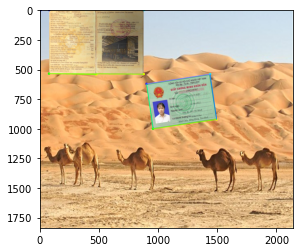

In [5]:
img = images[0]
keypoint_results, returned_outputs = inference_bottom_up_pose_model(model, img, 'BottomUpIDCardDataset', dataset_info, return_heatmap=True)
vis_result = vis_pose_result(model,
                             img,
                             keypoint_results,
                             radius=10,
                             thickness=5,
                             dataset=model.cfg.data.test.type,
                             show=False)
vis_result = cv2.cvtColor(vis_result, cv2.COLOR_BGR2RGB)
plt.imshow(vis_result)

In [31]:
keypoint_results

[{'keypoints': array([[9.00266113e+02, 6.22895996e+02, 1.00000000e+00],
         [9.54084473e+02, 1.00141846e+03, 1.00000000e+00],
         [1.49226807e+03, 9.22484863e+02, 1.00000000e+00],
         [1.43665576e+03, 5.40374512e+02, 1.00000000e+00]], dtype=float32),
  'score': 0.93666327,
  'area': 272938.9},
 {'keypoints': array([[7.8639160e+01, 3.9697266e-01, 1.0000000e+00],
         [7.6845215e+01, 5.3678662e+02, 1.0000000e+00],
         [4.7510107e+02, 5.4396240e+02, 1.0000000e+00],
         [8.7873877e+02, 3.9697266e-01, 1.0000000e+00]], dtype=float32),
  'score': 0.69927293,
  'area': 435881.62},
 {'keypoints': array([[6.8813477e+00, 3.9697266e-01, 1.0000000e+00],
         [7.6845215e+01, 5.3678662e+02, 1.0000000e+00],
         [8.7694482e+02, 5.4037451e+02, 1.0000000e+00],
         [8.7873877e+02, 3.9697266e-01, 1.0000000e+00]], dtype=float32),
  'score': 0.27970123,
  'area': 470783.44}]

In [32]:
dataset.ann_info

{'image_size': array(512),
 'heatmap_size': array([128, 256]),
 'num_joints': 4,
 'num_scales': 2,
 'scale_aware_sigma': False,
 'inference_channel': [0, 1, 2, 3],
 'dataset_channel': [[0, 1, 2, 3]],
 'flip_pairs': [[0, 3], [1, 2]],
 'flip_index': [3, 2, 1, 0],
 'upper_body_ids': [0, 3],
 'lower_body_ids': [1, 2],
 'joint_weights': array([[1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 'skeleton': [[0, 1], [1, 2], [2, 3], [3, 0]],
 'use_different_joint_weights': False}